In [4]:
#load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
import re
import nltk
nltk.download
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from textblob import TextBlob,Word,Blobber

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
#Read dataset
data = pd.read_csv("amazon.csv")  

In [6]:
#Read head 5
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [7]:
#shape of the dataset
data.shape

(1465, 16)

In [8]:
data.duplicated().value_counts()

False    1465
dtype: int64

In [7]:
#CHeck for the null values
 # data.isna()

In [9]:
#Sum of the nullvalues for each column
data.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [10]:
data["rating_count"].isna().sum()

2

In [11]:
#Drop the null values in the dataset
data.dropna(inplace=True)

In [11]:
#checking for the null values after droping the null values
data.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [149]:
data['category'].unique()

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1463 non-null   object
 1   product_name         1463 non-null   object
 2   category             1463 non-null   object
 3   discounted_price     1463 non-null   object
 4   actual_price         1463 non-null   object
 5   discount_percentage  1463 non-null   object
 6   rating               1463 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1463 non-null   object
 9   user_id              1463 non-null   object
 10  user_name            1463 non-null   object
 11  review_id            1463 non-null   object
 12  review_title         1463 non-null   object
 13  review_content       1463 non-null   object
 14  img_link             1463 non-null   object
 15  product_link         1463 non-null   object
dtypes: obj

In [14]:
data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [15]:
data.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463
unique,1349,1335,211,550,449,92,28,1143,1291,1192,1192,1192,1192,1210,1410,1463
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,231,52,118,56,244,9,6,10,10,10,10,8,3,1


In [13]:
#Processing the discounted price column 
discounted_price=[]
for i in data['discounted_price'].values:
    discounted_price.append(float(i[1:].replace(',','')))

In [14]:
data['discounted_price'] = discounted_price

In [15]:
data['discounted_price'].head()

0    399.0
1    199.0
2    199.0
3    329.0
4    154.0
Name: discounted_price, dtype: float64

In [16]:
#processing column actual price
actual_price=[]
for i in data['actual_price'].values:
    actual_price.append(float(i[1:].replace(',','')))

In [27]:
data['actual_price']=actual_price

In [21]:
data['actual_price'].head()

0    1099.0
1     349.0
2    1899.0
3     699.0
4     399.0
Name: actual_price, dtype: float64

In [22]:
#Processing column discount percentage
discount_percentage=[]
for i in data['discount_percentage'].values:
    discount_percentage.append(int(i[:-1])/100)

In [23]:
data['discount_percentage'] = discount_percentage

In [29]:
data['discount_percentage'].head()

0    64%
1    43%
2    90%
3    53%
4    61%
Name: discount_percentage, dtype: object

In [18]:
#processing the rating count column
rating_count=[]
for i in data['rating_count'].values:
    rating_count.append(int(i.replace(',','')))

In [19]:
data['rating_count']=rating_count
data['rating_count'].head()

0    24269
1    43994
2     7928
3    94363
4    16905
Name: rating_count, dtype: int64

In [20]:
#finding the unique category
unique_category=[]
for i in data['category'].values:
    unique_category+=i.split('|')

In [21]:
unique_category =list(set(unique_category))
unique_category

['OvenToasterGrills',
 'CoolingPads',
 'HomeMedicalSupplies&Equipment',
 'SurgeProtectors',
 'Keyboard&MiceAccessories',
 'PowerAccessories',
 'SpeakerCables',
 'StandMixerAccessories',
 'WaterPurifierAccessories',
 'LintShavers',
 'Car&Motorbike',
 'MediaStreamingDevices',
 'Financial&Business',
 'ExternalDevices&DataStorage',
 'Notebooks,WritingPads&Diaries',
 'StickBallpointPens',
 'Split-SystemAirConditioners',
 'HDMICables',
 'AutomobileAccessories',
 'Wet-DryVacuums',
 'ElectricKettles',
 'LaundryOrganization',
 'HandBlenders',
 'OfficeProducts',
 'StreamingClients',
 'Batteries&Chargers',
 'PCHeadsets',
 'StovetopEspressoPots',
 'MilkFrothers',
 'PCSpeakers',
 'Paper',
 'WaterHeaters&Geysers',
 'HandheldBags',
 'Kettle&ToasterSets',
 'BackgroundSupports',
 'AirFryers',
 'LaptopAccessories',
 'Rice&PastaCookers',
 'ManualChoppers&Chippers',
 'Webcams&VoIPEquipment',
 'Chargers',
 'Smartphones',
 'Vacuums&FloorCare',
 'Microphones',
 'Printers',
 'CompleteTripodUnits',
 'Accessori

In [22]:
len(unique_category)

317

In [23]:
distributiondata=[]
for i in unique_category:
    c=0
    for j in data.values:
        if(i in j[2]):
            c+=1
    distributiondata.append([i,c])

In [37]:
distributiondata

[['StickBallpointPens', 3],
 ['3DGlasses', 1],
 ['ImmersionRods', 9],
 ['SmallKitchenAppliances', 181],
 ['RCACables', 2],
 ['DVICables', 1],
 ['RemoteControls', 49],
 ['Mobiles&Accessories', 161],
 ['Scrapbooking', 1],
 ['CoffeeMakerAccessories', 3],
 ['CeilingFans', 11],
 ['SmallApplianceParts&Accessories', 2],
 ['SATACables', 1],
 ['EspressoMachines', 1],
 ['PedestalFans', 1],
 ['StorageWaterHeaters', 12],
 ['ExternalMemoryCardReaders', 1],
 ['HomeStorage&Organization', 16],
 ['Rice&PastaCookers', 5],
 ['InstantWaterHeaters', 23],
 ['AirConditioners', 1],
 ['SelfieSticks', 5],
 ['ExternalSolidStateDrives', 1],
 ['InternalSolidStateDrives', 3],
 ['Kettle&ToasterSets', 13],
 ['DataCards&Dongles', 1],
 ['StovetopEspressoPots', 1],
 ['LiquidInkRollerballPens', 2],
 ['Caddies', 1],
 ['JuicerMixerGrinders', 12],
 ['StandMixerAccessories', 1],
 ['Batteries&Chargers', 1],
 ['AirPurifiers', 5],
 ['HomeMedicalSupplies&Equipment', 1],
 ['CordManagement', 1],
 ['CompositionNotebooks', 7],
 ['St

In [24]:
#sorting the product distribution based on frequency
dfsetfreq = pd.DataFrame(distributiondata,columns=['category','freq'])

In [25]:
dfsetfreq_sorted= dfsetfreq.sort_values(by='freq',ascending=False)

In [26]:
# sorting products based on rating count
dfset=data.sort_values(by="rating_count",ascending=False)

In [27]:
dfset.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
12,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video|Accessories|C...",219.0,₹700,69%,4.4,426973,"Flexible, lightweight HDMI cable for connectin...","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41nPYaWA+M...,https://www.amazon.in/AmazonBasics-Flexible-HD...
65,B014I8SX4Y,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","Electronics|HomeTheater,TV&Video|Accessories|C...",309.0,"₹1,400",78%,4.4,426973,HDMI A Male to A Male Cable: Supports Ethernet...,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41eJqkFjCR...,https://www.amazon.in/AmazonBasics-High-Speed-...
47,B014I8SSD0,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","Electronics|HomeTheater,TV&Video|Accessories|C...",309.0,₹475,35%,4.4,426973,Please select appropriate display resolution &...,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41bCxnHksn...,https://www.amazon.in/AmazonBasics-High-Speed-...
684,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video|Accessories|C...",219.0,₹700,69%,4.4,426972,"Flexible, lightweight HDMI cable for connectin...","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41nPYaWA+M...,https://www.amazon.in/AmazonBasics-Flexible-HD...
400,B07GQD4K6L,boAt Bassheads 100 in Ear Wired Earphones with...,"Electronics|Headphones,Earbuds&Accessories|Hea...",379.0,₹999,62%,4.1,363713,The perfect way to add some style and stand ou...,"AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...","tarun kumar,mahesh radheshyam tawari,Blackspad...","R2DD2M5YARW7R2,R2M9ZYNGGV1ZLN,RNWNTRNLSJWSB,R3...","Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,https://m.media-amazon.com/images/I/31qVddHyy5...,https://www.amazon.in/Boat-BassHeads-100-Inspi...


In [28]:
#sorting based on discount price
dfset=data.sort_values(by='discounted_price',ascending=False)

In [38]:
dfset.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
249,B09WN3SRC7,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",77990.0,139900.0,0.44,4.7,5935,Resolution: 4K Ultra HD (3840 x 2160) | Refres...,"AF6Z2OYIXRPZJHVYN2MFKKYHPHFQ,AH5SAORYVUN5MGIBL...","David P.,Dr. ATUL THAKUR,Shriniwas Patil,Tahir...","R16HCZ0W1TRSMM,R12J7UKQ0FX3O9,R8729SR7LQFUU,R1...",Product installation was excellent but delive...,The delivery people were not careful with the ...,https://m.media-amazon.com/images/I/51uVckL1jR...,https://www.amazon.in/Sony-Bravia-inches-Googl...
325,B095JPKPH3,OnePlus 163.8 cm (65 inches) U Series 4K LED S...,"Electronics|HomeTheater,TV&Video|Televisions|S...",61999.0,69999.0,0.11,4.1,6753,Resolution: 4K Ultra HD (3840x2160) | Refresh ...,"AG3QTVXT2ODRVKOQJJRDV5KA2F2A,AGEYM57JOHPNX77ZY...","Rashmi,Raghvendra,Hari Prasad P,Vishnu singh,T...","R2PF9QV9JEQO9K,R2NEN86P63G4ES,R302B7X6H0GIC0,R...","Almost Perfect!,Review After using 1month,Nice...",Update after 9 months of use:1. The TV is stil...,https://m.media-amazon.com/images/I/41sSPp4pkY...,https://www.amazon.in/OnePlus-163-8-inches-And...
255,B0BC8BQ432,VU 164 cm (65 inches) The GloLED Series 4K Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",54990.0,85000.0,0.35,4.3,3587,Resolution: 4K Ultra HD (3840x2160) | Refresh ...,"AHY6AK5LXBTGXDDXSU57ISMDW55Q,AGULFHMPCHCL32WCI...","UtdBuzz,Mukund Nagvenkar,S.R K.,Pruthvi Raj Goud","R2G4T57OLXDVPL,R3IQ8PWVTWENBY,RH6UHEBP622FT,R3...",Good TV for the price. (But my experience was ...,",Screen quality is good.It's been a month I bo...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/VU-inches-GloLED-Google-...
192,B0B15GSPQW,Samsung 138 cm (55 inches) Crystal 4K Neo Seri...,"Electronics|HomeTheater,TV&Video|Televisions|S...",47990.0,70900.0,0.32,4.3,7109,Resolution : Crystal 4K Ultra HD (3840 x 2160)...,"AHDIDVECFGA6OQRNUBPUO6366UGQ,AFSII6HTAHTHGXERU...","Binu,Sabjan,Ramkapil,User,Amazon Customer,gane...","R3RUBB6REUGTT,R281851EB9L5G6,R4ATJJVUY9JO6,R18...","Best(Branded) Budget TV,A high-quality 4k Smar...","Before finalizing the AUE60 55"", I visited Cro...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Samsung-inches-Crystal-U...
283,B0B3XXSB1K,LG 139 cm (55 inches) 4K Ultra HD Smart LED TV...,"Electronics|HomeTheater,TV&Video|Televisions|S...",47990.0,79990.0,0.40,4.3,1376,Resolution: 4K Ultra HD (3840x2160) | Refresh ...,"AFCWL3MX7BP2ZUDD37MEAENZDQ2A,AGGFXDLCFZMTLJJDR...","Raj Mohammed,Samson,Haroon sayeed,P Imran Khan...","RC3ZLDRM8GA9T,RMDN4PSDM8SKK,R1YFAMDJ7P0SY3,R2W...","Love Amazon but lg is misleading,Amazing produ...",There's no magic remote and lg should include ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/LG-inches-Ultra-55UQ7500...


In [43]:
len(dfsetfreq)

317

In [29]:
dfsethead=dfsetfreq.head(20)
dfsethead = dfsethead.sort_values(by='freq',ascending=False )
dfsethead

,category,freq
17,HDMICables,24
9,LintShavers,22
13,ExternalDevices&DataStorage,18
14,"Notebooks,WritingPads&Diaries",14
8,WaterPurifierAccessories,11
4,Keyboard&MiceAccessories,10
19,Wet-DryVacuums,6
18,AutomobileAccessories,3
15,StickBallpointPens,3
1,CoolingPads,2


<AxesSubplot: xlabel='freq', ylabel='category'>

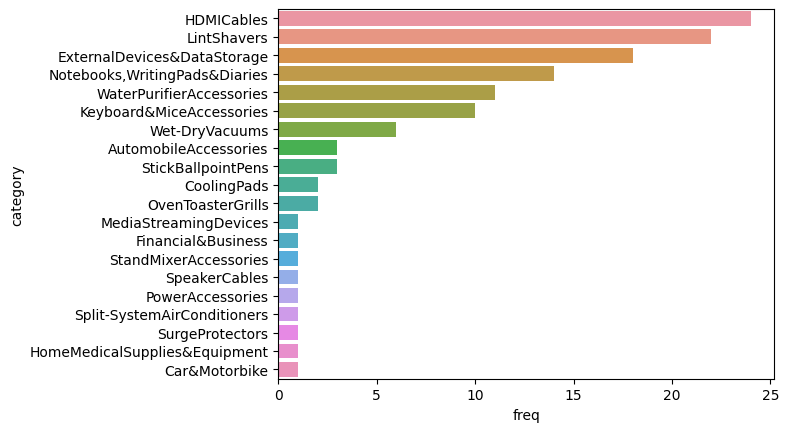

In [30]:
sns.barplot(y=dfsethead.category,x=dfsethead.freq)

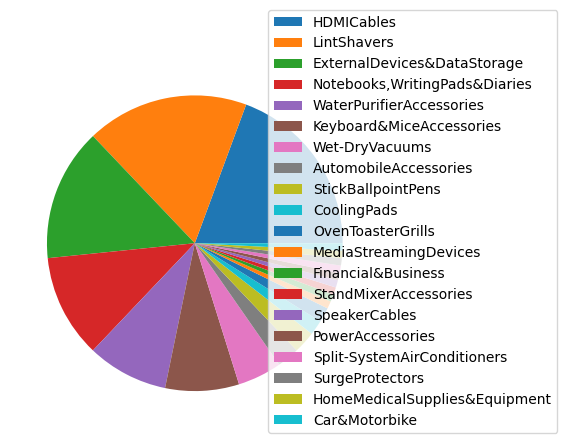

In [31]:
plt.pie(dfsethead.freq,labels=None)
plt.legend(labels=dfsethead.category,loc="upper right",bbox_to_anchor=(1.5,1.15))

C:\Users\aksha\AppData\Local\Temp\ipykernel_7272\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

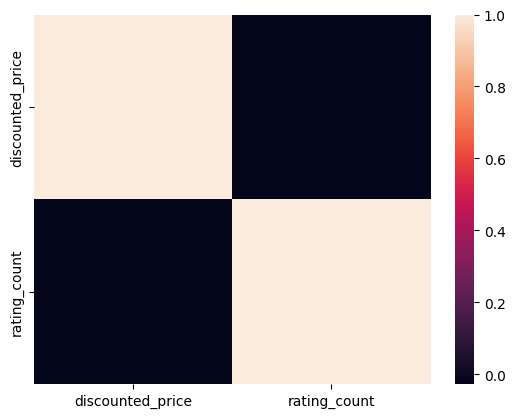

In [32]:
sns.heatmap(data.corr())

In [33]:
dfprice=data[['category','actual_price','discounted_price']]
dfprice

,category,actual_price,discounted_price
0,Computers&Accessories|Accessories&Peripherals|...,"₹1,099",399.0
1,Computers&Accessories|Accessories&Peripherals|...,₹349,199.0
2,Computers&Accessories|Accessories&Peripherals|...,"₹1,899",199.0
3,Computers&Accessories|Accessories&Peripherals|...,₹699,329.0
4,Computers&Accessories|Accessories&Peripherals|...,₹399,154.0
...,...,...,...
1460,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹919,379.0
1461,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹3,045",2280.0
1462,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹3,080",2219.0
1463,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,890",1399.0


In [34]:
dfprice.columns

Index(['category', 'actual_price', 'discounted_price'], dtype='object')

<AxesSubplot: xlabel='actual_price', ylabel='discounted_price'>

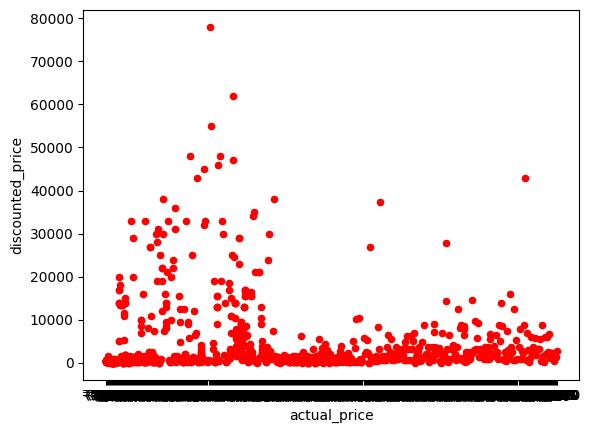

In [35]:
dfprice.plot.scatter(x='actual_price',y='discounted_price',c='red')

In [ ]:
################ NLP Techniques ###############

In [36]:
data.columns
data['review_content'].head()

0    Looks durable Charging is fine tooNo complains...
1    I ordered this cable to connect my phone to An...
2    Not quite durable and sturdy,https://m.media-a...
3    Good product,long wire,Charges good,Nice,I bou...
4    Bought this instead of original apple, does th...
Name: review_content, dtype: object

In [37]:
#Using Natural language processing techniques for the product review
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
#Function defition
def remove_punctuation(column):
    punc_free="".join([i for i in column if i not in string.punctuation])
    return punc_free

#Calling function
data['processed_review']=data['review_content'].apply(lambda x:remove_punctuation(x))
data['processed_review'].head()

0    Looks durable Charging is fine tooNo complains...
1    I ordered this cable to connect my phone to An...
2    Not quite durable and sturdyhttpsmmediaamazonc...
3    Good productlong wireCharges goodNiceI bought ...
4    Bought this instead of original apple does the...
Name: processed_review, dtype: object

In [39]:
#lowering the column text
data['lowercase_review'] = data['processed_review'].apply(lambda x:x.lower())
data['lowercase_review'].head()

0    looks durable charging is fine toono complains...
1    i ordered this cable to connect my phone to an...
2    not quite durable and sturdyhttpsmmediaamazonc...
3    good productlong wirecharges goodnicei bought ...
4    bought this instead of original apple does the...
Name: lowercase_review, dtype: object

In [40]:
#Tokenization process
def tokenization(columns):
    tokens = re.split('\s+',columns)
    return tokens
data['review_tokens'] = data['lowercase_review'].apply(lambda x: tokenization(x))
data['review_tokens'].head()

0    [looks, durable, charging, is, fine, toono, co...
1    [i, ordered, this, cable, to, connect, my, pho...
2    [not, quite, durable, and, sturdyhttpsmmediaam...
3    [good, productlong, wirecharges, goodnicei, bo...
4    [bought, this, instead, of, original, apple, d...
Name: review_tokens, dtype: object

In [41]:
#Removing stop words using nltk
stopwords=nltk.corpus.stopwords.words('english')
#print(stopwords)

In [42]:
def remove_stopwords(columns):
    op=[i for i in columns if i not in stopwords]
    return op
data['review_stopwords_free']=data['review_tokens'].apply(lambda x: remove_stopwords(x))
data['review_stopwords_free'].head()

0    [looks, durable, charging, fine, toono, compla...
1    [ordered, cable, connect, phone, android, auto...
2    [quite, durable, sturdyhttpsmmediaamazoncomima...
3    [good, productlong, wirecharges, goodnicei, bo...
4    [bought, instead, original, apple, work, 150rs...
Name: review_stopwords_free, dtype: object

In [66]:
#Stemming
porterstemmer = PorterStemmer()
def stemming(columns):
    op = [porterstemmer.stem(word) for word in columns]
    return op
data['review_stemming']=data['review_stopwords_free'].apply(lambda x:stemming(x))
data['review_stemming'].head()

0    [look, durabl, charg, fine, toono, complainsch...
1    [order, cabl, connect, phone, android, auto, c...
2    [quit, durabl, sturdyhttpsmmediaamazoncomimage...
3    [good, productlong, wirecharg, goodnicei, boug...
4    [bought, instead, origin, appl, work, 150r, fa...
Name: review_stemming, dtype: object

In [43]:
#lemmatization
wordnet_lemma= WordNetLemmatizer()
def lemmatizer(columns):
    lemmas = [wordnet_lemma.lemmatize(word) for word in columns]
    return lemmas
data['review_lemma']=data['review_stopwords_free'].apply(lambda x:lemmatizer(x))
data['review_lemma'].head()

0    [look, durable, charging, fine, toono, complai...
1    [ordered, cable, connect, phone, android, auto...
2    [quite, durable, sturdyhttpsmmediaamazoncomima...
3    [good, productlong, wirecharges, goodnicei, bo...
4    [bought, instead, original, apple, work, 150rs...
Name: review_lemma, dtype: object

In [44]:
def joinlemma(col):
    str1=""
    for i in col:
        str1+=i+' '
    return str1
data['review_joined']=data['review_lemma'].apply(lambda x:joinlemma(x))
data['review_joined'].head()

0    look durable charging fine toono complainschar...
1    ordered cable connect phone android auto car c...
2    quite durable sturdyhttpsmmediaamazoncomimages...
3    good productlong wirecharges goodnicei bought ...
4    bought instead original apple work 150rs fast ...
Name: review_joined, dtype: object

In [45]:
# using textblob to find polarity and subjectivity
subjectivity=[]
polarity=[]
def findblob(i):
    j=TextBlob(i)
    ans=j.sentiment
    subjectivity.append(ans[0])
    polarity.append(ans[1])
    return ans

data['subj_polar']=data['review_joined'].apply(lambda x:findblob(x))
data['subj_polar'].head()

0    (0.48194444444444445, 0.6750000000000002)
1    (0.22296650717703348, 0.5204146730462519)
2                                   (0.6, 1.0)
3     (0.3333333333333333, 0.6142857142857144)
4    (0.33251602564102567, 0.6389138176638177)
Name: subj_polar, dtype: object

In [46]:
data['review_subjectivity']=subjectivity
data['review_polarity']=polarity

In [47]:
data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'processed_review',
       'lowercase_review', 'review_tokens', 'review_stopwords_free',
       'review_lemma', 'review_joined', 'subj_polar', 'review_subjectivity',
       'review_polarity'],
      dtype='object')

In [48]:
def find_category(columns):
    str1=columns.split('|')
    return str1[-1]
data['product_category']=data['category'].apply(lambda x:find_category(x))
data['product_category'].head()

0    USBCables
1    USBCables
2    USBCables
3    USBCables
4    USBCables
Name: product_category, dtype: object

In [49]:
#dataframe for product and review
reviewdf=data[['product_category','review_content','review_subjectivity','review_polarity']]
reviewdf.head(20)

,product_category,review_content,review_subjectivity,review_polarity
0,USBCables,Looks durable Charging is fine tooNo complains...,0.481944,0.675000
1,USBCables,I ordered this cable to connect my phone to An...,0.222967,0.520415
2,USBCables,"Not quite durable and sturdy,https://m.media-a...",0.600000,1.000000
3,USBCables,"Good product,long wire,Charges good,Nice,I bou...",0.333333,0.614286
4,USBCables,"Bought this instead of original apple, does th...",0.332516,0.638914
5,USBCables,"It's a good product.,Like,Very good item stron...",0.486667,0.386667
6,USBCables,Build quality is good and it is comes with 2 y...,0.677778,0.466667
7,USBCables,Worth for money - suitable for Android auto......,0.507292,0.608333
8,WirelessUSBAdapters,I use this to connect an old PC to internet. I...,0.328180,0.530067
9,USBCables,I ordered this cable to connect my phone to An...,0.222967,0.520415


In [50]:
dfsetfreq_sorted.head()

,category,freq
46,Accessories,888
60,Electronics,530
153,Computers&Accessories,451
256,Home&Kitchen,448
104,Accessories&Peripherals,379


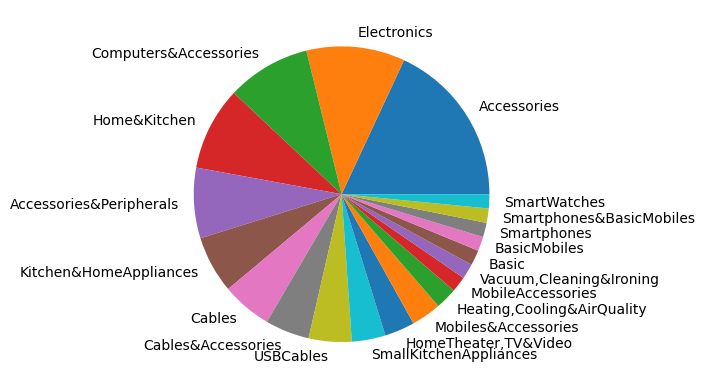

In [51]:
plt.pie(dfsetfreq_sorted['freq'].head(20),labels=dfsetfreq_sorted['category'].head(20))
plt.show()

In [52]:
determined_subjectivity=[]
for i in reviewdf['review_subjectivity'].values:
    if(0.5<i<=1.0):
        ans="More subjective"
    elif(0<i<=0.5):
        ans="More objective"
    elif(i==0):
        ans="Neutral"
    determined_subjectivity.append(ans)

In [53]:
determined_polarity=[]
for i in reviewdf['review_polarity'].values:
    if(i>0):
        ans="Positive"
    elif(i==0):
        ans="Neutral"
    elif(i<0):
        ans="Negative"
    determined_polarity.append(ans)

In [54]:
reviewdf['determined_subjectivity']= determined_subjectivity
reviewdf['determined_polarity']= determined_polarity
reviewdf.head(20)

C:\Users\aksha\AppData\Local\Temp\ipykernel_7272\1104413052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewdf['determined_subjectivity']= determined_subjectivity
C:\Users\aksha\AppData\Local\Temp\ipykernel_7272\1104413052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewdf['determined_polarity']= determined_polarity


,product_category,review_content,review_subjectivity,review_polarity,determined_subjectivity,determined_polarity
0,USBCables,Looks durable Charging is fine tooNo complains...,0.481944,0.675000,More objective,Positive
1,USBCables,I ordered this cable to connect my phone to An...,0.222967,0.520415,More objective,Positive
2,USBCables,"Not quite durable and sturdy,https://m.media-a...",0.600000,1.000000,More subjective,Positive
3,USBCables,"Good product,long wire,Charges good,Nice,I bou...",0.333333,0.614286,More objective,Positive
4,USBCables,"Bought this instead of original apple, does th...",0.332516,0.638914,More objective,Positive
5,USBCables,"It's a good product.,Like,Very good item stron...",0.486667,0.386667,More objective,Positive
6,USBCables,Build quality is good and it is comes with 2 y...,0.677778,0.466667,More subjective,Positive
7,USBCables,Worth for money - suitable for Android auto......,0.507292,0.608333,More subjective,Positive
8,WirelessUSBAdapters,I use this to connect an old PC to internet. I...,0.328180,0.530067,More objective,Positive
9,USBCables,I ordered this cable to connect my phone to An...,0.222967,0.520415,More objective,Positive


In [90]:
reviewdf['product_category']=reviewdf['product_category'].apply(lambda x:x.lower())

C:\Users\aksha\AppData\Local\Temp\ipykernel_7272\3466851689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewdf['product_category']=reviewdf['product_category'].apply(lambda x:x.lower())


In [126]:
finaldf=reviewdf[['product_category']]

In [127]:
#get Product similarity
finaldf['texts']=reviewdf['product_category']+' - '+reviewdf['review_content']

C:\Users\aksha\AppData\Local\Temp\ipykernel_7272\3745578677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldf['texts']=reviewdf['product_category']+' - '+reviewdf['review_content']


In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [96]:
vectorizer=TfidfVectorizer()
tfidf_max=vectorizer.fit_transform(finaldf['texts'])

In [97]:
cosine_sim=cosine_similarity(tfidf_max,tfidf_max)

In [138]:
#Get product recommedation

def get_recommedation(productname,recoms=2):
    index=finaldf[finaldf['product_category']==productname].index[0]
    similarityscore=list(enumerate(cosine_sim[index]))
    similarityscore=sorted(similarityscore,key=lambda x:x[1],reverse=True)
    top_products = [finaldf.iloc[score[0]] for score in similarityscore[1:recoms+1]]
    return top_products

In [145]:
list(set(reviewdf['product_category']))

In [134]:
finaldf.head(5)

,product_category,texts
0,usbcables,usbcables - Looks durable Charging is fine too...
1,usbcables,usbcables - I ordered this cable to connect my...
2,usbcables,"usbcables - Not quite durable and sturdy,https..."
3,usbcables,"usbcables - Good product,long wire,Charges goo..."
4,usbcables,usbcables - Bought this instead of original ap...


In [153]:
print("Available products")
print("Speaker Cables,Macro and ringlight Flashes,USBCables,OpticalCables, Small Kitchen APpliances... ")
productname=input("Enter the product name to get review: ")
recoms=get_recommedation(productname.lower())
print('------------------------------------------------------------------------------------------------------')
print(recoms)
print('------------------------------------------------------------------------------------------------------')

Available products
Speaker Cables,Macro and ringlight Flashes,USBCables,OpticalCables, Small Kitchen APpliances... 
Enter the product name to get review: smallkitchenappliances
------------------------------------------------------------------------------------------------------
[product_category                                           eggboilers
texts               eggboilers - It is very easy to use and egg ge...
Name: 1088, dtype: object, product_category                                         handblenders
texts               handblenders - This is my first coffee frother...
Name: 1194, dtype: object]
------------------------------------------------------------------------------------------------------
